In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cd "D:\AntWak\project\Customer Churn Analysis EDA Using Python\Python Project Dataset\Customer Data\Customer Data"

D:\AntWak\project\Customer Churn Analysis EDA Using Python\Python Project Dataset\Customer Data\Customer Data


In [3]:
custattsta=pd.read_csv('Customer Attrition Status.csv',header='infer')
custattsta.isnull().sum()
custattsta.dropna(inplace=True)
custattsta.CustomerId = custattsta.CustomerId.astype(int)
custattsta.Exited = custattsta.Exited.astype(int)
custattsta = custattsta.drop(['RowNumber'], axis=1)
custattsta.head(10)

,CustomerId,Exited
0,15634602,1
1,15647311,0
2,15619304,1
3,15701354,0
4,15737888,0
5,15574012,1
6,15592531,0
7,15656148,1
8,15792365,0
9,15592389,0


In [4]:
custdemo=pd.read_csv('Customer Demographics.csv',header='infer')
custdemo.isnull().sum()
custdemo.dropna(inplace=True)
custdemo.CustomerId = custdemo.CustomerId.astype(int)
custdemo.Age = custdemo.Age.astype(int)
custdemo.head(10)

,RowNumber,CustomerId,Surname,Geography,Gender,Age
0,1,15634602,Hargrave,West,Female,42
1,2,15647311,Hill,Central,Female,41
2,3,15619304,Onio,West,Female,42
3,4,15701354,Boni,West,Female,39
4,5,15737888,Mitchell,Central,Female,43
5,6,15574012,Chu,Central,Male,44
6,7,15592531,Bartlett,West,Male,50
7,8,15656148,Obinna,East,Female,29
8,9,15792365,He,West,Male,44
9,10,15592389,H?,West,Male,27


In [5]:
custinvsnap=pd.read_csv('Customer Investment Snapshot.csv',header='infer')
custinvsnap.isnull().sum()
custinvsnap.dropna(subset=["CustomerId"],inplace=True)
custinvsnap=custinvsnap.fillna(0)
custinvsnap.CustomerId = custinvsnap.CustomerId.astype(int)
custinvsnap.Tenure = custinvsnap.Tenure.astype(int)
custinvsnap.CreditScore = custinvsnap.CreditScore.astype(int)
custinvsnap = custinvsnap.drop(['RowNumber'], axis=1)
#missing_column = custinvsnap['Balance']
#for i in missing_column:
    #custinvsnap.loc[custinvsnap.loc[:,i].isnull(),i]=custinvsnap.loc[:,i].mean()
custinvsnap.head(10)

,CustomerId,Tenure,CreditScore,Balance,EstimatedSalary
0,15634602,2,619,0.00,101348.88
1,15647311,1,608,83807.86,112542.58
2,15619304,8,502,159660.80,113931.57
3,15701354,1,699,0.00,93826.63
4,15737888,2,850,125510.82,79084.10
5,15574012,8,645,113755.78,149756.71
6,15592531,7,822,0.00,10062.80
7,15656148,30,376,115046.74,119346.88
8,15792365,4,865,142051.07,74940.50
9,15592389,2,684,134603.88,71725.73


In [6]:
custportsnap=pd.read_csv('Customer Portfolio Snapshot.csv',header='infer')
custportsnap = custportsnap.drop(['RowNumber'], axis=1)
custportsnap.dropna(inplace=True)
custportsnap.NumOfProducts = custportsnap.NumOfProducts.astype(int)
custportsnap.HasChckng = custportsnap.HasChckng.astype(int)
custportsnap.IsActiveMember = custportsnap.IsActiveMember.astype(int)
custportsnap.drop_duplicates(subset ="CustomerId",keep = 'first', inplace = True)
duplicate = custportsnap[custportsnap.duplicated('CustomerId')]
custportsnap.head(10)

,CustomerId,NumOfProducts,HasChckng,IsActiveMember
0,15565701,1,0,0
1,15565706,1,1,1
2,15565714,2,0,1
3,15565779,1,1,0
4,15565796,1,1,0
5,15565806,2,0,0
6,15565878,2,1,1
7,15565879,2,1,1
8,15565891,2,1,0
9,15565996,2,1,1


In [7]:
finaldf= custdemo.merge(custattsta,on='CustomerId').merge(custinvsnap,on='CustomerId').merge(custportsnap,on='CustomerId')
finaldf = finaldf[['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasChckng', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [8]:
finaldf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,West,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Central,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,West,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,West,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Central,Female,43,2,125510.82,1,1,1,79084.10,0


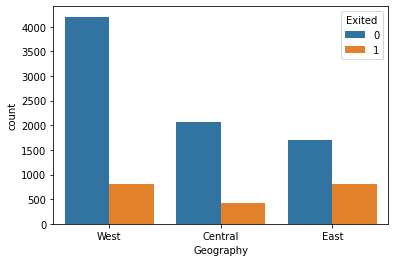

In [11]:
plt.plot: sns.countplot(x="Geography",data=finaldf, hue="Exited")

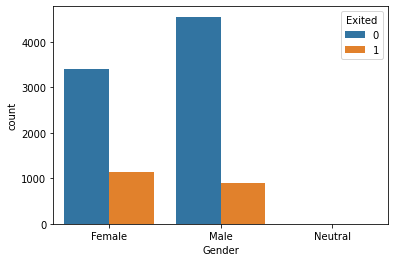

In [14]:
plt.plot: sns.countplot(x="Gender",data=finaldf, hue="Exited")